<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#BPL-2018---2019-Data-Cleaning" data-toc-modified-id="BPL-2018---2019-Data-Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>BPL 2018 - 2019 Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#FIFA-19-Player-Stats" data-toc-modified-id="FIFA-19-Player-Stats-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>FIFA 19 Player Stats</a></span></li><li><span><a href="#BPL-2018-2019-season-fixtures" data-toc-modified-id="BPL-2018-2019-season-fixtures-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>BPL 2018-2019 season fixtures</a></span><ul class="toc-item"><li><span><a href="#Cleaning-fixtures-data" data-toc-modified-id="Cleaning-fixtures-data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Cleaning fixtures data</a></span></li></ul></li><li><span><a href="#Combination-of-Team-Stats-and-Fixtures" data-toc-modified-id="Combination-of-Team-Stats-and-Fixtures-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Combination of Team Stats and Fixtures</a></span></li></ul></li></ul></div>

# BPL 2018 - 2019 Data Cleaning

In this notebook, we will trial run the first part of cleaning and making the code ready for use. The cleaning for the rest of the season will be based on this notebook.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_rows',None)
pd.set_option('max_columns',None)

## FIFA 19 Player Stats

In [3]:
fifa19 = pd.read_csv('data/fifastats/players_19.csv')

In [4]:
fifa19.head()

sofifa_id                                         player_url  \
0      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
1     158023  https://sofifa.com/player/158023/lionel-messi/...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     193080  https://sofifa.com/player/193080/david-de-gea-...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name  age         dob  \
0  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   33  1985-02-05   
1           L. Messi       Lionel Andrés Messi Cuccittini   31  1987-06-24   
2             Neymar        Neymar da Silva Santos Júnior   26  1992-02-05   
3             De Gea                David De Gea Quintana   27  1990-11-07   
4       K. De Bruyne                      Kevin De Bruyne   27  1991-06-28   

   height_cm  weight_kg nationality            club_name  \
0        187         83    Portugal             Juventus   
1        170         72   Argentina         FC Barcelona   
2        175         68      Brazil  Paris Saint-Germain   
3        193         76       Spain    Manchester United   
4        181         70     Belgium      Manchester City   

              league_name  league_rank  overall  potential  value_eur  \
0         Italian Serie A          1.0       94         94   77000000   
1  Spain Primera Division          1.0       94         94  110500000   
2          French Ligue 1          1.0       92         93  118500000   
3  English Premier League          1.0       91         93   72000000   
4  English Premier League          1.0       91         92  102000000   

   wage_eur player_positions preferred_foot  international_reputation  \
0    400000           ST, LW          Right                         5   
1    575000       CF, RW, ST           Left                         5   
2    300000               LW          Right                         5   
3    250000               GK          Right                         4   
4    350000          CAM, CM          Right                         4   

   weak_foot  skill_moves      work_rate   body_type real_face  \
0          4            5       High/Low  C. Ronaldo       Yes   
1          4            4  Medium/Medium       Messi       Yes   
2          5            5    High/Medium      Neymar       Yes   
3          3            1  Medium/Medium        Lean       Yes   
4          5            4      High/High      Normal       Yes   

   release_clause_eur                                        player_tags  \
0         127100000.0  #Speedster, #Dribbler, #Distance Shooter, #Acr...   
1         226500000.0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
2         228100000.0  #Speedster, #Dribbler, #FK Specialist, #Acroba...   
3         138600000.0                                                NaN   
4         196400000.0  #Dribbler, #Playmaker, #Engine, #Distance Shoo...   

  team_position  team_jersey_number loaned_from      joined  \
0            ST                 7.0         NaN  2018-07-10   
1            RW                10.0         NaN  2004-07-01   
2            LW                10.0         NaN  2017-08-03   
3            GK                 1.0         NaN  2011-07-01   
4           RCM                17.0         NaN  2015-08-30   

   contract_valid_until nation_position  nation_jersey_number  pace  shooting  \
0                2022.0              LS                   7.0  90.0      93.0   
1                2021.0              CF                  10.0  88.0      91.0   
2                2022.0              LW                  10.0  92.0      84.0   
3                2019.0              GK                   1.0   NaN       NaN   
4                2023.0             RCM                   7.0  77.0      86.0   

   passing  dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0     81.0       89.0       35.0    79.0        NaN          NaN         NaN   
1     88.0  

As we will be looking at the team data, we will be dropping some individual players stats.

In [5]:
fifa19.drop(columns = ['sofifa_id','player_url','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm',
 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb','real_face','body_type','player_tags','team_position','loaned_from','joined','contract_valid_until',
 'nation_position','nation_jersey_number','player_traits','release_clause_eur','gk_positioning','gk_diving', 'gk_handling',
       'gk_kicking', 'gk_reflexes'],inplace=True)

In [6]:
bpl_2019_teams = ['Arsenal','Bournemouth','Brighton & Hove Albion','Burnley','Cardiff City','Chelsea','Crystal Palace',
           'Everton','Fulham','Huddersfield Town','Leicester City','Liverpool','Manchester United','Manchester City','Newcastle United',
           'Southampton','Tottenham Hotspur','West Ham United','Watford','Wolverhampton Wanderers']
len(bpl_2019_teams)

20

In [7]:
fifa19bplteams = fifa19.loc[fifa19['club_name'].isin(bpl_2019_teams)]

In [8]:
fifa19bplteams.head()

short_name              long_name  age         dob  height_cm  \
3         De Gea  David De Gea Quintana   27  1990-11-07        193   
4   K. De Bruyne        Kevin De Bruyne   27  1991-06-28        181   
8      E. Hazard            Eden Hazard   27  1991-01-07        173   
18       H. Kane             Harry Kane   24  1993-07-28        188   
20      N. Kanté           N'Golo Kanté   27  1991-03-29        168   

    weight_kg nationality          club_name             league_name  \
3          76       Spain  Manchester United  English Premier League   
4          70     Belgium    Manchester City  English Premier League   
8          74     Belgium            Chelsea  English Premier League   
18         89     England  Tottenham Hotspur  English Premier League   
20         68      France            Chelsea  English Premier League   

    league_rank  overall  potential  value_eur  wage_eur player_positions  \
3           1.0       91         93   72000000    250000               GK   
4           1.0       91         92  102000000    350000          CAM, CM   
8           1.0       91         91   93000000    325000           LW, CF   
18          1.0       89         92   86000000    200000               ST   
20          1.0       89         90   63000000    225000          CDM, CM   

   preferred_foot  international_reputation  weak_foot  skill_moves  \
3           Right                         4          3            1   
4           Right                         4          5            4   
8           Right                         4          4            4   
18          Right                         3          4            3   
20          Right                         3          3            2   

        work_rate  team_jersey_number  pace  shooting  passing  dribbling  \
3   Medium/Medium                 1.0   NaN       NaN      NaN        NaN   
4       High/High                17.0  77.0      86.0     92.0       87.0   
8     High/Medium                10.0  91.0      82.0     86.0       94.0   
18      High/High                10.0  70.0      90.0     79.0       80.0   
20    Medium/High                 7.0  80.0      66.0     77.0       81.0   

    defending  physic  gk_speed  attacking_crossing  attacking_finishing  \
3         NaN     NaN      58.0                  17                   13   
4        60.0    78.0       NaN                  93                   83   
8        35.0    67.0       NaN                  81                   84   
18       47.0    83.0       NaN                  75                   94   
20       87.0    84.0       NaN                  68                   65   

    attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
3                           21                       50                 13   
4                           55                       92                 82   
8                           61                       89                 80   
18                          85                       80                 82   
20                          54                       86                 56   

    skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
3                18           21                 19                  51   
4                86           85                 83                  91   
8                95           83                 79                  83   
18               80           78                 68                  82   
20               79           49                 49                  81   

    skill_ball_control  movement_acceleration  movement_sprint_speed  \
3                   42                     57                     58   
4                   91                     78                     76   
8                   94                     93                     89   
18                  84                     68                     72   
20                  80                     82           

In [9]:
fifa19bplteams.columns

Index(['short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg',
       'nationality', 'club_name', 'league_name', 'league_rank', 'overall',
       'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'team_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_speed',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_

In [10]:
fifa19bplteams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 3 to 17374
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  660 non-null    object 
 1   long_name                   660 non-null    object 
 2   age                         660 non-null    int64  
 3   dob                         660 non-null    object 
 4   height_cm                   660 non-null    int64  
 5   weight_kg                   660 non-null    int64  
 6   nationality                 660 non-null    object 
 7   club_name                   660 non-null    object 
 8   league_name                 660 non-null    object 
 9   league_rank                 660 non-null    float64
 10  overall                     660 non-null    int64  
 11  potential                   660 non-null    int64  
 12  value_eur                   660 non-null    int64  
 13  wage_eur                    660 n

In [11]:
#to_convert = fifa19bplteams[['attacking_crossing', 'attacking_finishing',
#       'attacking_heading_accuracy', 'attacking_short_passing',
#       'attacking_volleys', 'skill_dribbling', 'skill_curve',
#       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
#       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
#       'movement_reactions', 'movement_balance', 'power_shot_power',
#       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
#       'mentality_aggression', 'mentality_interceptions',
#       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
#       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
#       'defending_sliding_tackle', 'goalkeeping_diving',
#       'goalkeeping_handling', 'goalkeeping_kicking',
#       'goalkeeping_positioning', 'goalkeeping_reflexes']]
#for col in to_convert:
#    fifa19bplteams[col]=fifa19bplteams[col].str.split('+',n=1,expand = True)[0]
#    fifa19bplteams[col]=fifa19bplteams[col].str.split('-',n=1,expand = True)[0]

In [12]:
fifa19bplteams.drop(columns = ['work_rate','weak_foot','pace','shooting','passing','dribbling','defending','physic','gk_speed',
                               'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes'],inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
fifa19bplteams.isnull().sum()

short_name                  0
long_name                   0
age                         0
dob                         0
height_cm                   0
weight_kg                   0
nationality                 0
club_name                   0
league_name                 0
league_rank                 0
overall                     0
potential                   0
value_eur                   0
wage_eur                    0
player_positions            0
preferred_foot              0
international_reputation    0
skill_moves                 0
team_jersey_number          0
dtype: int64

In [14]:
fifa19bplteams = fifa19bplteams.fillna(value=0)

In [15]:
fifa19bplteams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 3 to 17374
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   short_name                660 non-null    object 
 1   long_name                 660 non-null    object 
 2   age                       660 non-null    int64  
 3   dob                       660 non-null    object 
 4   height_cm                 660 non-null    int64  
 5   weight_kg                 660 non-null    int64  
 6   nationality               660 non-null    object 
 7   club_name                 660 non-null    object 
 8   league_name               660 non-null    object 
 9   league_rank               660 non-null    float64
 10  overall                   660 non-null    int64  
 11  potential                 660 non-null    int64  
 12  value_eur                 660 non-null    int64  
 13  wage_eur                  660 non-null    int64  
 14  player_p

In [16]:
#fifa19bplteams_a = fifa19bplteams.groupby('club',sort=False,as_index=False)['value_eur','wage_eur'].sum()
#fifa19bplteams_b =  fifa19bplteams.groupby('club',sort=False,as_index=False)['age','height_cm','weight_kg','overall','potential','international_reputation','weak_foot',
#                                'skill_moves', 'work_rate' ,'pace','shooting','passing','dribbling','defending', 'physic', 'gk_speed','attacking_crossing', 'attacking_finishing',
#                                 'attacking_heading_accuracy', 'attacking_short_passing','attacking_volleys','skill_dribbling',
#                                'skill_curve','skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control','movement_acceleration',
#                                'movement_sprint_speed', 'movement_agility','movement_reactions', 'movement_balance', 'power_shot_power',
#                                'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots','mentality_aggression', 'mentality_interceptions',
#                                'mentality_positioning', 'mentality_vision', 'mentality_penalties','mentality_composure', 'defending_marking', 
#                                'defending_standing_tackle','defending_sliding_tackle', 'goalkeeping_diving','goalkeeping_handling', 
#                                'goalkeeping_kicking','goalkeeping_positioning', 'goalkeeping_reflexes'].mean()
#bpl19stats = pd.merge(fifa19bplteams_a,round(fifa19bplteams_b,2),left_index=True,right_index=True)
#bpl19stats.drop(columns =['club_y'],inplace=True)

## BPL 2018-2019 season fixtures 

In [17]:
bpl2019 = pd.read_csv('data/epl2019/epl2019.csv')

In [18]:
bpl2019['Home'] = bpl2019['Home'].str.replace('Brighton &amp; Hove Albion','Brighton & Hove Albion')
bpl2019['Away'] = bpl2019['Away'].str.replace('Brighton &amp; Hove Albion','Brighton & Hove Albion')
bpl2019['Match'] = bpl2019['Match'].str.replace('Brighton_&amp;_Hove_Albion','Brighton_&_Hove_Albion')

In [19]:
bpl2019.drop(bpl2019.loc[bpl2019['Player'].str.contains('Players')].index,inplace=True)

In [20]:
bpl2019.drop(columns=['Won%','Cmp%','Int_y'],inplace=True)

In [21]:
bpl2019.Attendance= bpl2019.Attendance.str.replace(',','')

In [22]:
bpl2019.head()

Player     #  Nation    Pos     Age  Min  Gls  Ast  PK  \
0  Pierre-Emerick Aubameyang  14.0  ga GAB  FW,RW  29-254   70    1    0   0   
1               Denis Suárez  22.0  es ESP     RW  25-052   20    0    0   0   
2         Henrikh Mkhitaryan   7.0  am ARM  AM,RW  30-037   63    1    2   0   
3        Alexandre Lacazette   9.0  fr FRA  FW,RW  27-275   27    1    0   0   
4                 Mesut Özil  10.0  de GER     AM  30-135   90    1    1   0   

   PKatt  Sh  SoT  CrdY  CrdR  Touches  Press  Tkl  Int_x  Blocks   xG  npxG  \
0      0   4    1     0     0       27     17    0      0       1  0.8   0.8   
1      0   0    0     0     0       19      7    1      0       0  0.0   0.0   
2      0   2    1     0     0       52     20    1      0       1  0.7   0.7   
3      0   3    2     0     0       12      6    0      0       0  0.3   0.3   
4      0   2    1     0     0       81     17    1      1       0  0.4   0.4   

    xA  SCA  GCA  Cmp  Att  Prog  Carries  Prog.1  Succ  Att.1     Home  \
0  0.2    2    1   12   19     2       18       4     1      1  Arsenal   
1  0.0    0    0   13   14     0       18       4     0      2  Arsenal   
2  1.1    9    4   36   41     7       44       5     1      2  Arsenal   
3  0.0    0    0    6    6     0        9       2     1      1  Arsenal   
4  1.2    9    2   68   75     9       73      11     1      2  Arsenal   

          Away                   Match        Date                   Stadium  \
0  Bournemouth  Arsenal_vs_Bournemouth  2019-02-27  Emirates Stadium, London   
1  Bournemouth  Arsenal_vs_Bournemouth  2019-02-27  Emirates Stadium, London   
2  Bournemouth  Arsenal_vs_Bournemouth  2019-02-27  Emirates Stadium, London   
3  Bournemouth  Arsenal_vs_Bournemouth  2019-02-27  Emirates Stadium, London   
4  Bournemouth  Arsenal_vs_Bournemouth  2019-02-27  Emirates Stadium, London   

  Attendance  2CrdY  Fls  Fld  Off  Crs  TklW  PKwon  PKcon  OG  Recov  Won  \
0      59618      0    0    0    1    1     0      0      0   0      1    1   
1      59618      0    0    0    0    0     1      0      0   0      3    0   
2      59618      0    2    1    0    1     1      0      0   0      5    0   
3      59618      0    0    1    2    0     0      0      0   0      1    0   
4      59618      0    0    2    1    2     1      0      0   0      2    0   

   Lost  
0     3  
1     0  
2     1  
3     0  
4     0

In [23]:
teamstats = pd.DataFrame()
for team in bpl_2019_teams:
    fixtures = bpl2019.loc[(bpl2019['Home'] == team) | (bpl2019['Away'] == team)]
    team_players = fixtures['Player'].value_counts()[:18]
    team_players = list(team_players.index)

    jersey_num = list(fixtures.loc[fixtures['Player'].isin(team_players)]['#'])
    jersey_num = list(set(jersey_num))
    fifateam = fifa19bplteams.loc[(fifa19bplteams['club_name'] == team)]
    
    for j in jersey_num:
        oh = fifateam.loc[(fifateam['team_jersey_number'] == j)]
        teamstats = teamstats.append(oh)

In [24]:
teamstats['club_name'].value_counts()

Manchester United          18
Manchester City            18
Cardiff City               18
Liverpool                  18
Burnley                    18
Tottenham Hotspur          18
Arsenal                    18
Wolverhampton Wanderers    18
Southampton                18
Newcastle United           18
Everton                    18
Brighton & Hove Albion     18
Watford                    18
West Ham United            17
Chelsea                    17
Huddersfield Town          17
Leicester City             17
Crystal Palace             17
Fulham                     17
Bournemouth                16
Name: club_name, dtype: int64

In [25]:
teamstats = teamstats.reset_index(drop=True)
teamstats = teamstats.sort_values(by='club_name')

In [26]:
teamstats.drop_duplicates(ignore_index=True,inplace=True)

In [27]:
teamstats_a = teamstats.groupby('club_name',sort=False,as_index=False)['value_eur','wage_eur'].sum()
teamstats_b =  teamstats.groupby('club_name',sort=False,as_index=False)['age', 'dob', 'height_cm', 'weight_kg',
       'nationality', 'overall','potential','international_reputation','skill_moves'].mean()
teamstats_c =  teamstats.groupby('club_name',sort=False,as_index=False)['age', 'dob', 'height_cm', 'weight_kg',
       'nationality', 'overall','potential','international_reputation','skill_moves'].std()

<ipython-input-27-02befdd7084c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teamstats_a = teamstats.groupby('club_name',sort=False,as_index=False)['value_eur','wage_eur'].sum()
<ipython-input-27-02befdd7084c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teamstats_b =  teamstats.groupby('club_name',sort=False,as_index=False)['age', 'dob', 'height_cm', 'weight_kg',
<ipython-input-27-02befdd7084c>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teamstats_c =  teamstats.groupby('club_name',sort=False,as_index=False)['age', 'dob', 'height_cm', 'weight_kg',


In [28]:
teamstats = pd.merge(teamstats_a,round(teamstats_b,2),left_index=True,right_index=True)

In [29]:
teamstats = pd.merge(teamstats,round(teamstats_c,2),left_index=True,right_index=True)

In [30]:
teamstats.columns

Index(['club_name_x', 'value_eur', 'wage_eur', 'club_name_y', 'age_x',
       'height_cm_x', 'weight_kg_x', 'overall_x', 'potential_x',
       'international_reputation_x', 'skill_moves_x', 'club_name', 'age_y',
       'height_cm_y', 'weight_kg_y', 'overall_y', 'potential_y',
       'international_reputation_y', 'skill_moves_y'],
      dtype='object')

In [31]:
teamstats = teamstats.rename(columns = {'club_name_x':'club','value_eur':'total_value_eur','wage_eur':'total_wage_eur',
                           'age_x':'average_age','height_cm_x':'average_height_cm','weight_kg_x':'average_weight_kg','overall_x':'average_overall',
                           'potential_x':'average_potential', 'international_reputation_x':'average_internationl_reputation','skill_moves_x':'average_skill_moves',
                           'age_y' : 'age_std','height_cm_y':'height_cm_std','weight_kg_y':'weight_kg_std','overall_y':'overall_std',
                            'potential_y':'potential_std','international_reputation_y':'international_reputation_std','skill_moves_y':'skills_moves_average'})

In [32]:
teamstats.drop(columns='club_name_y',inplace=True)

Text(0.5, 1.0, 'Correlation between teamstats')

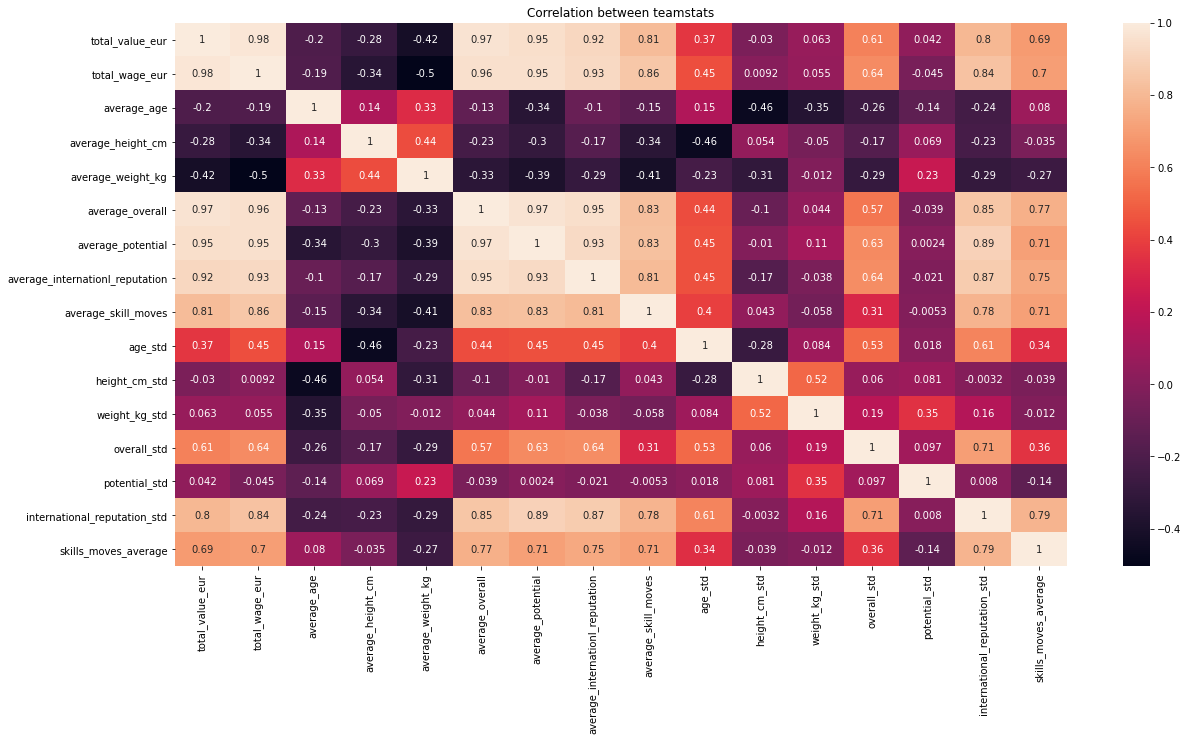

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(teamstats.corr(),annot=True)
plt.title('Correlation between teamstats')

It seems that overall, potential, value, wage and international reputation are very positively correlated with each other. These are stats which basically determine how well-established and strong are the teams.

In [34]:
teamstats[['club_name','total_value_eur']]

club_name  total_value_eur
0                   Arsenal        369000000
1               Bournemouth        119000000
2    Brighton & Hove Albion        145600000
3                   Burnley        153525000
4              Cardiff City         73975000
5                   Chelsea        498300000
6            Crystal Palace        163000000
7                   Everton        243000000
8                    Fulham        150375000
9         Huddersfield Town        107800000
10           Leicester City        197500000
11                Liverpool        515500000
12          Manchester City        692800000
13        Manchester United        527000000
14         Newcastle United        145700000
15              Southampton        159025000
16        Tottenham Hotspur        527500000
17                  Watford        149100000
18          West Ham United        171800000
19  Wolverhampton Wanderers        164525000

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

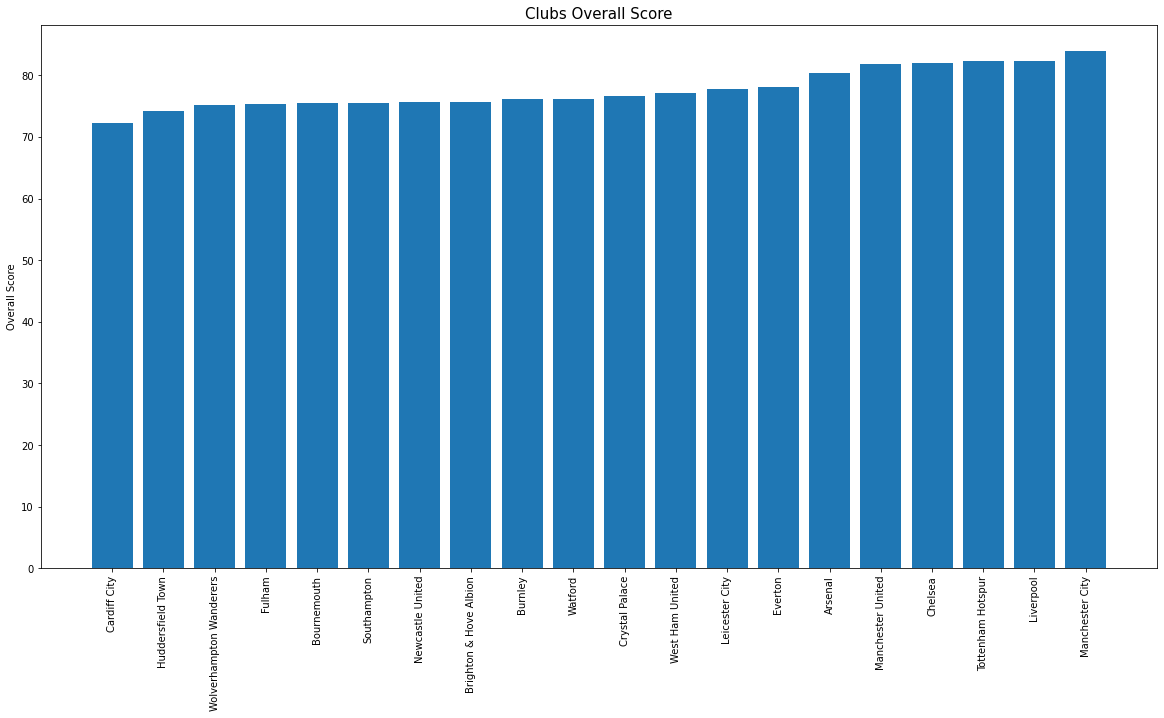

In [35]:
ova_teamstats = teamstats.sort_values('average_overall')
plt.figure(figsize=(20,10))
plt.bar(data = ova_teamstats,x = 'club_name',height='average_overall')
plt.ylabel('Overall Score',size=10)
plt.title('Clubs Overall Score',size=15)
plt.xticks(rotation=90)

#overall stats

In [36]:
teamstats.to_csv('data/clean_first/bplteamstats2019_clean1.csv',index=False)

### Cleaning fixtures data

In [37]:
combined_df_new = bpl2019.groupby(['Date','Match','Home','Away','Stadium','Attendance'],sort=False,as_index=False)['Gls', 'Ast', 'PK', 'PKatt',
       'Sh', 'SoT', 'CrdY', 'CrdR', 'Touches', 'Press', 'Tkl', 'Int_x',
       'Blocks', 'xG', 'npxG', 'xA', 'SCA', 'GCA', 'Cmp', 'Att', 'Prog',
       'Carries', 'Prog.1', 'Succ', 'Att.1', 'Home', 'Away', 'Match', 'Date',
       'Stadium', 'Attendance', '2CrdY', 'Fls', 'Fld', 'Off', 'Crs','TklW', 
        'PKwon', 'PKcon', 'OG', 'Recov', 'Won', 'Lost'].sum()

<ipython-input-37-982e49da211e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  combined_df_new = bpl2019.groupby(['Date','Match','Home','Away','Stadium','Attendance'],sort=False,as_index=False)['Gls', 'Ast', 'PK', 'PKatt',


In [38]:
combined_df_new.head()

Date                              Match                    Home  \
0  2019-02-27             Arsenal_vs_Bournemouth                 Arsenal   
1  2019-02-27             Arsenal_vs_Bournemouth             Bournemouth   
2  2019-05-05  Arsenal_vs_Brighton_&_Hove_Albion                 Arsenal   
3  2019-05-05  Arsenal_vs_Brighton_&_Hove_Albion  Brighton & Hove Albion   
4  2018-12-22                 Arsenal_vs_Burnley                 Arsenal   

                     Away                   Stadium Attendance  Gls  Ast  PK  \
0             Bournemouth  Emirates Stadium, London      59618    5    4   0   
1                 Arsenal  Emirates Stadium, London      59618    1    1   0   
2  Brighton & Hove Albion  Emirates Stadium, London      59965    1    0   1   
3                 Arsenal  Emirates Stadium, London      59965    1    0   1   
4                 Burnley  Emirates Stadium, London      59493    3    2   0   

   PKatt  Sh  SoT  CrdY  CrdR  Touches  Press  Tkl  Int_x  Blocks   xG  npxG  \
0      0  17    6     2     0      790    155   10      8      14  3.0   3.0   
1      0  13    5     2     0      491    235   15      8      27  1.3   1.3   
2      1  19    6     5     0      745    109   13      4       6  2.3   1.5   
3      1  10    4     2     0      418    166   20      7      25  1.7   0.9   
4      0  11    6     2     0      683    153   17      5      10  1.3   1.3   

    xA  SCA  GCA  Cmp  Att  Prog  Carries  Prog.1  Succ  Att.1  2CrdY  Fls  \
0  3.0   32   10  604  692    38      612      68     4     10      0   11   
1  1.0   19    2  299  386    24      297      38     4      7      0   13   
2  0.8   34    2  529  619    55      545      83    20     28      0    9   
3  0.8   19    2  192  270    16      194      25     8     17      0   15   
4  0.7   18    5  498  576    31      495      38     6     10      0   12   

   Fld  Off  Crs  TklW  PKwon  PKcon  OG  Recov  Won  Lost  
0   11    4    9     7      0      0   0     76    8     8  
1   11    4    9    12      0      0   0     74    8     8  
2   13    2   19     9      1      1   0     79   24    15  
3    7    4   11    12      1      1   0     69   15    24  
4   14    2    8    11      0      0   0     66   14    16

In [39]:
combined_df_new.drop_duplicates(inplace=True)

In [40]:
combined_df_new.head()

Date                              Match                    Home  \
0  2019-02-27             Arsenal_vs_Bournemouth                 Arsenal   
1  2019-02-27             Arsenal_vs_Bournemouth             Bournemouth   
2  2019-05-05  Arsenal_vs_Brighton_&_Hove_Albion                 Arsenal   
3  2019-05-05  Arsenal_vs_Brighton_&_Hove_Albion  Brighton & Hove Albion   
4  2018-12-22                 Arsenal_vs_Burnley                 Arsenal   

                     Away                   Stadium Attendance  Gls  Ast  PK  \
0             Bournemouth  Emirates Stadium, London      59618    5    4   0   
1                 Arsenal  Emirates Stadium, London      59618    1    1   0   
2  Brighton & Hove Albion  Emirates Stadium, London      59965    1    0   1   
3                 Arsenal  Emirates Stadium, London      59965    1    0   1   
4                 Burnley  Emirates Stadium, London      59493    3    2   0   

   PKatt  Sh  SoT  CrdY  CrdR  Touches  Press  Tkl  Int_x  Blocks   xG  npxG  \
0      0  17    6     2     0      790    155   10      8      14  3.0   3.0   
1      0  13    5     2     0      491    235   15      8      27  1.3   1.3   
2      1  19    6     5     0      745    109   13      4       6  2.3   1.5   
3      1  10    4     2     0      418    166   20      7      25  1.7   0.9   
4      0  11    6     2     0      683    153   17      5      10  1.3   1.3   

    xA  SCA  GCA  Cmp  Att  Prog  Carries  Prog.1  Succ  Att.1  2CrdY  Fls  \
0  3.0   32   10  604  692    38      612      68     4     10      0   11   
1  1.0   19    2  299  386    24      297      38     4      7      0   13   
2  0.8   34    2  529  619    55      545      83    20     28      0    9   
3  0.8   19    2  192  270    16      194      25     8     17      0   15   
4  0.7   18    5  498  576    31      495      38     6     10      0   12   

   Fld  Off  Crs  TklW  PKwon  PKcon  OG  Recov  Won  Lost  
0   11    4    9     7      0      0   0     76    8     8  
1   11    4    9    12      0      0   0     74    8     8  
2   13    2   19     9      1      1   0     79   24    15  
3    7    4   11    12      1      1   0     69   15    24  
4   14    2    8    11      0      0   0     66   14    16

In [41]:
combined_df_new.sort_values('Date').head()

Date                                  Match               Home  \
514  2018-08-10    Manchester_United_vs_Leicester_City  Manchester United   
515  2018-08-10    Manchester_United_vs_Leicester_City     Leicester City   
44   2018-08-11            Bournemouth_vs_Cardiff_City        Bournemouth   
45   2018-08-11            Bournemouth_vs_Cardiff_City       Cardiff City   
562  2018-08-11  Newcastle_United_vs_Tottenham_Hotspur   Newcastle United   

                  Away                               Stadium Attendance  Gls  \
514     Leicester City              Old Trafford, Manchester      74439    2   
515  Manchester United              Old Trafford, Manchester      74439    1   
44        Cardiff City         Vitality Stadium, Bournemouth      10353    2   
45         Bournemouth         Vitality Stadium, Bournemouth      10353    0   
562  Tottenham Hotspur  St. James' Park, Newcastle upon Tyne      51749    1   

     Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  Press  Tkl  Int_x  Blocks  \
514    1   1      1   7    5     2     0      625    123   19     14      25   
515    0   0      0  13    4     1     0      676    191   16     12      10   
44     2   0      1  11    3     1     0      657    118    7      1      13   
45     0   0      0  10    1     1     0      442    154   18      7      31   
562    1   0      0  13    3     2     0      540    170   12      2      18   

      xG  npxG   xA  SCA  GCA  Cmp  Att  Prog  Carries  Prog.1  Succ  Att.1  \
514  1.5   0.7  0.8   14    3  397  501    22      447      31     7     11   
515  1.2   1.2  0.6   20    2  457  579    40      502      67     6      6   
44   2.1   1.4  1.2   18    3  419  558    47      464      38     8     10   
45   1.4   1.4  0.4   16    0  188  326    22      202      16     5      9   
562  0.6   0.6  0.6    9    2  298  433    29      332      27    10     16   

     2CrdY  Fls  Fld  Off  Crs  TklW  PKwon  PKcon  OG  Recov  Won  Lost  
514      0   18    8    4    8    11      0      0   0     96    3    13  
515      0    9   18    2   19    11      0      1   0    115   13     3  
44       0   12   13    0   13     2      1      0   0    131   15    20  
45       0   14   12    2   13     8      0      1   0    121   20    15  
562      0   12   14    1    6     7      0      0   0    135   14    11

In [42]:
combined_df_new.sort_values('Date').tail()

Date                                      Match  \
114  2019-05-12                         Burnley_vs_Arsenal   
99   2019-05-12  Brighton_&_Hove_Albion_vs_Manchester_City   
98   2019-05-12  Brighton_&_Hove_Albion_vs_Manchester_City   
390  2019-05-12                  Leicester_City_vs_Chelsea   
115  2019-05-12                         Burnley_vs_Arsenal   

                       Home                    Away  \
114                 Burnley                 Arsenal   
99          Manchester City  Brighton & Hove Albion   
98   Brighton & Hove Albion         Manchester City   
390          Leicester City                 Chelsea   
115                 Arsenal                 Burnley   

                                               Stadium Attendance  Gls  Ast  \
114                                 Turf Moor, Burnley      21461    1    1   
99   The American Express Community Stadium, Bright...      30662    4    3   
98   The American Express Community Stadium, Bright...      30662    1    1   
390                      King Power Stadium, Leicester      32140    0    0   
115                                 Turf Moor, Burnley      21461    3    2   

     PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  Press  Tkl  Int_x  Blocks   xG  \
114   0      0  13    4     5     0      503    145   24      6      28  1.9   
99    0      0  20    8     0     0      913     87   18      5       5  1.7   
98    0      0   6    2     0     0      380    179   16      4      16  0.3   
390   0      0   9    3     0     0      603    196   17     11      12  0.3   
115   0      0  17    6     1     0      694    140   13      8       7  1.9   

     npxG   xA  SCA  GCA  Cmp  Att  Prog  Carries  Prog.1  Succ  Att.1  2CrdY  \
114   1.9  1.5   21    2  286  385    17      297      32    10     14      0   
99    1.7  1.5   33    8  751  825    52      761     116     9     17      0   
98    0.3  0.3    8    2  197  274     8      212      11     8     16      0   
390   0.3  0.3   11    0  432  509    23      467      38     8     13      0   
115   1.9  1.5   25    4  480  571    37      496      67     6     15      0   

     Fls  Fld  Off  Crs  TklW  PKwon  PKcon  OG  Recov  Won  Lost  
114   15    4    4   15    16      0      0   0     90   20    18  
99     8   14    1   18    10      0      0   0     84    8    13  
98    14    8    1    2     9      0      0   0     67   13     8  
390   14    9    1   11    12      0      0   0     71    4     5  
115    4   14    0   18     9      0      0   0     94   18    20

In [43]:
combined_df_new.to_csv('data/clean_first/bpl2019_clean1.csv',index=False)

In [44]:
type(combined_df_new.Date[1])

str

In [45]:
combined_df_new['date_new'] = combined_df_new['Date'].str.replace('-','')

In [46]:
date_new = []
for i in combined_df_new['Date']:
    i = str(i).replace('-','')
    date_new.append(i)
    
combined_df_new['date_new'] = pd.DataFrame(np.array(date_new))


In [47]:
combined_df_new

Date                                              Match  \
0    2019-02-27                             Arsenal_vs_Bournemouth   
1    2019-02-27                             Arsenal_vs_Bournemouth   
2    2019-05-05                  Arsenal_vs_Brighton_&_Hove_Albion   
3    2019-05-05                  Arsenal_vs_Brighton_&_Hove_Albion   
4    2018-12-22                                 Arsenal_vs_Burnley   
5    2018-12-22                                 Arsenal_vs_Burnley   
6    2019-01-29                            Arsenal_vs_Cardiff_City   
7    2019-01-29                            Arsenal_vs_Cardiff_City   
8    2019-01-19                                 Arsenal_vs_Chelsea   
9    2019-01-19                                 Arsenal_vs_Chelsea   
10   2019-04-21                          Arsenal_vs_Crystal_Palace   
11   2019-04-21                          Arsenal_vs_Crystal_Palace   
12   2018-09-23                                 Arsenal_vs_Everton   
13   2018-09-23                                 Arsenal_vs_Everton   
14   2019-01-01                                  Arsenal_vs_Fulham   
15   2019-01-01                                  Arsenal_vs_Fulham   
16   2018-12-08                       Arsenal_vs_Huddersfield_Town   
17   2018-12-08                       Arsenal_vs_Huddersfield_Town   
18   2018-10-22                          Arsenal_vs_Leicester_City   
19   2018-10-22                          Arsenal_vs_Leicester_City   
20   2018-11-03                               Arsenal_vs_Liverpool   
21   2018-11-03                               Arsenal_vs_Liverpool   
22   2018-08-12                         Arsenal_vs_Manchester_City   
23   2018-08-12                         Arsenal_vs_Manchester_City   
24   2019-03-10                       Arsenal_vs_Manchester_United   
25   2019-03-10                       Arsenal_vs_Manchester_United   
26   2019-04-01                        Arsenal_vs_Newcastle_United   
27   2019-04-01                        Arsenal_vs_Newcastle_United   
28   2019-02-24                             Arsenal_vs_Southampton   
29   2019-02-24                             Arsenal_vs_Southampton   
30   2018-12-02                       Arsenal_vs_Tottenham_Hotspur   
31   2018-12-02                       Arsenal_vs_Tottenham_Hotspur   
32   2018-09-29                                 Arsenal_vs_Watford   
33   2018-09-29                                 Arsenal_vs_Watford   
34   2018-08-25                         Arsenal_vs_West_Ham_United   
35   2018-08-25                         Arsenal_vs_West_Ham_United   
36   2018-11-11                 Arsenal_vs_Wolverhampton_Wanderers   
37   2018-11-11                 Arsenal_vs_Wolverhampton_Wanderers   
38   2018-11-25                             Bournemouth_vs_Arsenal   
39   2018-11-25                             Bournemouth_vs_Arsenal   
40   2018-12-22              Bournemouth_vs_Brighton_&_Hove_Albion   
41   2018-12-22              Bournemouth_vs_Brighton_&_Hove_Albion   
42   2019-04-06                             Bournemouth_vs_Burnley   
43   2019-04-06                             Bournemouth_vs_Burnley   
44   2018-08-11                        Bournemouth_vs_Cardiff_City   
45   2018-08-11                        Bournemouth_vs_Cardiff_City   
46   2019-01-30                             Bournemouth_vs_Chelsea   
47   2019-01-30                             Bournemouth_vs_Chelsea   
48   2018-10-01                      Bournemouth_vs_Crystal_Palace   
49   2018-10-01                      Bournemouth_vs_Crystal_Palace   
50   2018-08-25                             Bournemouth_vs_Everton   
51   2018-08-25                             Bournemouth_vs_Everton   
52   2019-04-20                              Bournemouth_vs_Fulham   
53   2019-04-20                              Bournemouth_vs_Fulham   
54   2018-12-04                   Bournemouth_vs_Huddersfield_Town   
55   2018-12-04                   Bournemouth_vs_Huddersfield_Town   
56   2018-09-15      

In [48]:
def average_last_5_stats(feature,df):
    '''
    Description: Its picks a variable(str) and generates the 5 last games mean of this variable until the last game played.
    
    Input:
        - Variable (Str)
    Output: 
        - Last 5 games Variable Mean until the new game (Int)    
    
    '''
    last = []
    for i, j in zip(df['date_new'],df["Home"]):
        new_team = df.loc[df["date_new"]<i]
        last5 = new_team.loc[new_team["Home"]==j]
        last5= last5.reset_index(drop=True)
        last5 = last5[-5:]
        last5 = last5[feature].mean()
        last.append(last5)

    df["last_5_avrg_"+feature] = pd.DataFrame(np.array(last))

In [49]:
combined_df_new.columns

Index(['Date', 'Match', 'Home', 'Away', 'Stadium', 'Attendance', 'Gls', 'Ast',
       'PK', 'PKatt', 'Sh', 'SoT', 'CrdY', 'CrdR', 'Touches', 'Press', 'Tkl',
       'Int_x', 'Blocks', 'xG', 'npxG', 'xA', 'SCA', 'GCA', 'Cmp', 'Att',
       'Prog', 'Carries', 'Prog.1', 'Succ', 'Att.1', '2CrdY', 'Fls', 'Fld',
       'Off', 'Crs', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'Won', 'Lost',
       'date_new'],
      dtype='object')

In [50]:
col = ['Gls', 'Ast','PK', 'PKatt', 'Sh', 'SoT', 'CrdY', 'CrdR', 'Touches', 'Press', 'Tkl','Int_x', 'Blocks', 'xG', 'npxG',
       'xA', 'SCA', 'GCA', 'Cmp', 'Att','Prog', 'Carries', 'Prog.1', 'Succ', 'Att.1', '2CrdY', 'Fls', 'Fld', 'Off', 'Crs',
        'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'Won','Lost']
for c in col:
    average_last_5_stats(c,combined_df_new)

In [51]:
test = combined_df_new.iloc[1::2]
test2 = combined_df_new.iloc[::2]

In [52]:
test3 = pd.merge(test2,test,how='outer',on = ['Date','Match'])

In [53]:
test3.head()

Date                              Match   Home_x  \
0  2019-02-27             Arsenal_vs_Bournemouth  Arsenal   
1  2019-05-05  Arsenal_vs_Brighton_&_Hove_Albion  Arsenal   
2  2018-12-22                 Arsenal_vs_Burnley  Arsenal   
3  2019-01-29            Arsenal_vs_Cardiff_City  Arsenal   
4  2019-01-19                 Arsenal_vs_Chelsea  Arsenal   

                   Away_x                 Stadium_x Attendance_x  Gls_x  \
0             Bournemouth  Emirates Stadium, London        59618      5   
1  Brighton & Hove Albion  Emirates Stadium, London        59965      1   
2                 Burnley  Emirates Stadium, London        59493      3   
3            Cardiff City  Emirates Stadium, London        59933      2   
4                 Chelsea  Emirates Stadium, London        59979      2   

   Ast_x  PK_x  PKatt_x  Sh_x  SoT_x  CrdY_x  CrdR_x  Touches_x  Press_x  \
0      4     0        0    17      6       2       0        790      155   
1      0     1        1    19      6       5       0        745      109   
2      2     0        0    11      6       2       0        683      153   
3      1     1        1    14      3       3       0        744      128   
4      2     0        0    12      5       0       0        549      366   

   Tkl_x  Int_x_x  Blocks_x  xG_x  npxG_x  xA_x  SCA_x  GCA_x  Cmp_x  Att_x  \
0     10        8        14   3.0     3.0   3.0     32     10    604    692   
1     13        4         6   2.3     1.5   0.8     34      2    529    619   
2     17        5        10   1.3     1.3   0.7     18      5    498    576   
3     12        0        12   1.9     1.2   1.0     28      4    549    625   
4     38        9        11   1.5     1.5   1.3     20      4    298    395   

   Prog_x  Carries_x  Prog.1_x  Succ_x  Att.1_x  2CrdY_x  Fls_x  Fld_x  Off_x  \
0      38        612        68       4       10        0     11     11      4   
1      55        545        83      20       28        0      9     13      2   
2      31        495        38       6       10        0     12     14      2   
3      54        547        69       6       12        0     14     13      1   
4      25        318        21      11       17        0     13     18      1   

   Crs_x  TklW_x  PKwon_x  PKcon_x  OG_x  Recov_x  Won_x  Lost_x date_new_x  \
0      9       7        0        0     0       76      8       8   20190227   
1     19       9        1        1     0       79     24      15   20190505   
2      8      11        0        0     0       66     14      16   20181222   
3     17       5        1        0     0       73      4      15   20190129   
4     12      22        0        0     0       94     10       9   20190119   

   last_5_avrg_Gls_x  last_5_avrg_Ast_x  last_5_avrg_PK_x  \
0                1.2                0.8               0.0   
1                1.0                0.8               0.0   
2                2.4                1.6               0.0   
3                1.2                0.8               0.0   
4                1.2                0.8               0.0   

   last_5_avrg_PKatt_x  last_5_avrg_Sh_x  last_5_avrg_SoT_x  \
0                  0.0               9.8                2.8   
1                  0.2              12.4                2.8   
2                  0.0               9.8                3.8   
3                  0.0              10.4                2.8   
4                  0.0              10.4                2.8   

   last_5_avrg_CrdY_x  last_5_avrg_CrdR_x  last_5_avrg_Touches_x  \
0                 1.4                 0.0                  699.2   
1                 1.6                 0.2                  709.8   
2                 1.2                 0.0                  728.2   
3                 1.6                 0.0                  724.2   
4                 1.6                 0.0                  724.2   

   last_5_avrg_Press_x  last_5_avrg_Tkl_x  last_5_avrg_Int_x_x  \
0                174.2               12.6                  9.6   
1         

In [54]:
test3.columns[20:]

Index(['npxG_x', 'xA_x', 'SCA_x', 'GCA_x', 'Cmp_x', 'Att_x', 'Prog_x',
       'Carries_x', 'Prog.1_x', 'Succ_x',
       ...
       'last_5_avrg_Fld_y', 'last_5_avrg_Off_y', 'last_5_avrg_Crs_y',
       'last_5_avrg_TklW_y', 'last_5_avrg_PKwon_y', 'last_5_avrg_PKcon_y',
       'last_5_avrg_OG_y', 'last_5_avrg_Recov_y', 'last_5_avrg_Won_y',
       'last_5_avrg_Lost_y'],
      dtype='object', length=140)

In [55]:
test3.columns = map(str.lower, test3.columns)
test3.drop(columns=['away_y','away_x','attendance_y','stadium_y','date_new_x','date_new_y'],inplace= True)

In [56]:
columns = list(test3.columns)

In [57]:
#all features
new_features =  {'home_x':'home','gls_x':'h_gls','ast_x':'h_ast', 'pk_x':'h_pk',
'pkatt_x':'h_pkatt', 'sh_x':'h_sh','sot_x':'h_sot', 'crdy_x':'h_yellow', '2crdy_x' : 'h_yellow2',
'crdr_x':'h_red', 'crs_x':'h_crs', 'touches_x':'h_touches','press_x':'h_press','tkl_x':'h_tkl','int_x_x':'h_int',
'blocks_x':'h_blk','xg_x':'h_xg','npxg_x':'h_npxg','xa_x':'h_xa','sca_x':'h_sca','gca_x':'h_gca',
'cmp_x':'h_cmp','att_x':'h_pass_att','prog_x':'h_pass_prog','carries_x':'h_carries','prog.1_x':'h_carries_prog',
'succ_x':'h_dri_succ','att.1_x':'h_dri_att','fls_x':'h_fls','fld_x':'h_fld','off_x':'h_off', 'crs_x':'h_crs',
'tklw_x':'h_tklw', 'pkwon_x':'h_pkwon', 'pkcon_x' : 'h_pkcon','og_x':'h_og','recov_x':'h_recov','won_x':'h_aer_won',
'lost_x':'h_aer_lost', 'last_5_avrg_gls_x':'h_last_5_avrg_gls','last_5_avrg_ast_x':'h_last_5_avrg_ast',
'last_5_avrg_pk_x':'h_last_5_avrg_pk','last_5_avrg_pkatt_x':'h_last_5_avrg_pkatt','last_5_avrg_sh_x':'h_last_5_avrg_sh',
'last_5_avrg_sot_x': 'h_last_5_avrg_sot','last_5_avrg_crdy_x':'h_last_5_avrg_yellow','last_5_avrg_crdr_x':'h_last_5_avrg_red',
'last_5_avrg_touches_x':'h_last_5_touches','last_5_avrg_press_x':'h_last_5_avrg_press','last_5_avrg_tkl_x':'h_last_5_avrg_tkl',
'last_5_avrg_int_x_x':'h_last_5_avrg_int','last_5_avrg_blocks_x':'h_last_5_avrg_blk','last_5_avrg_xg_x':'h_last_5_avrg_xg',
'last_5_avrg_npxg_x':'h_last_5_avrg_npxg','last_5_avrg_xa_x':'h_last_5_avrg_xa','last_5_avrg_sca_x':'h_last_5_avrg_sca',
'last_5_avrg_gca_x':'h_last_5_avrg_gca','last_5_avrg_cmp_x':'h_last_5_avrg_cmp','last_5_avrg_att_x':'h_last_5_avrg_pass_att',
'last_5_avrg_prog_x':'h_last_5_avrg_pass_prog','last_5_avrg_carries_x':'h_last_5_avrg_carries','last_5_avrg_prog.1_x':'h_last_5_avrg_carries_prog',
'last_5_avrg_succ_x':'h_last_5_avrg_dri_succ','last_5_avrg_att.1_x':'h_last_5_avrg_dri_att','last_5_avrg_2crdy_x':'h_last_5_avrg_yellow2',
'last_5_avrg_fls_x':'h_last_5_avrg_fls','last_5_avrg_fld_x':'h_last_5_avrg_fld','last_5_avrg_off_x':'h_last_5_avrg_off',
'last_5_avrg_crs_x':'h_last_5_avrg_crs','last_5_avrg_tklw_x':'h_last_5_avrg_tklw','last_5_avrg_pkwon_x':'h_last_5_avrg_pkwon',
'last_5_avrg_pkcon_x':'h_last_5_avrg_pkcon', 'last_5_avrg_og_x': 'h_last_5_avrg_og', 'last_5_avrg_recov_x':'h_last_5_avrg_recov',
'last_5_avrg_won_x':'h_last_5_avrg_aer_won','last_5_avrg_lost_x':'h_last_5_avrg_aer_lost',
#away features
'home_y':'away','gls_y':'a_gls','ast_y':'a_ast', 'pk_y':'a_pk','pkatt_y':'a_pkatt','sh_y':'a_sh', 
'sot_y':'a_sot','crdy_y':'a_yellow', '2crdy_y' : 'a_yellow2','crdr_y':'a_red', 'crs_y':'a_crs', 'touches_y':'a_touches',
'press_y':'a_press','tkl_y':'a_tkl','int_x_y':'a_int','blocks_y':'a_blk','xg_y':'a_xg','npxg_y':'a_npxg','xa_y':'a_xa',
'sca_y':'a_sca','gca_y':'a_gca', 'cmp_y':'a_cmp','att_y':'a_pass_att','prog_y':'a_pass_prog','carries_y':'a_carries',
'prog.1_y':'a_carries_prog','succ_y':'a_dri_succ','att.1_y':'a_dri_att','fls_y':'a_fls','fld_y':'a_fld','off_y':'a_off', 
'crs_y':'a_crs','tklw_y':'a_tklw', 'pkwon_y':'a_pwon', 'pkcon_y' : 'a_pkcon','og_y':'a_og','recov_y':'a_recov','won_y':'a_aer_won',
'lost_y':'a_aer_lost','attendance_x':'attendance','stadium_x':'stadium','last_5_avrg_gls_y':'a_last_5_avrg_gls',
'last_5_avrg_ast_y':'a_last_5_avrg_ast', 'last_5_avrg_pk_y':'a_last_5_avrg_pk','last_5_avrg_pkatt_y':'a_last_5_avrg_pkatt',
'last_5_avrg_sh_y':'a_last_5_avrg_sh', 'last_5_avrg_sot_y': 'a_last_5_avrg_sot','last_5_avrg_crdy_y':'a_last_5_avrg_yellow',
'last_5_avrg_crdr_y':'a_last_5_avrg_red','last_5_avrg_touches_y':'a_last_5_touches','last_5_avrg_press_y':'a_last_5_avrg_press',
'last_5_avrg_tkl_y':'a_last_5_avrg_tkl','last_5_avrg_int_x_y':'a_last_5_avrg_int','last_5_avrg_blocks_y':'a_last_5_avrg_blk',
'last_5_avrg_xg_y':'a_last_5_avrg_xg','last_5_avrg_npxg_y':'a_last_5_avrg_npxg','last_5_avrg_xa_y':'a_last_5_avrg_xa','last_5_avrg_sca_y':'a_last_5_avrg_sca',       
'last_5_avrg_gca_y':'a_last_5_avrg_gca', 'last_5_avrg_cmp_y':'a_last_5_avrg_cmp','last_5_avrg_att_y':'a_last_5_avrg_pass_att',
'last_5_avrg_prog_y':'a_last_5_avrg_pass_prog','last_5_avrg_carries_y':'a_last_5_avrg_carries','last_5_avrg_prog.1_y':'a_last_5_avrg_carries_prog',
'last_5_avrg_succ_y':'a_last_5_avrg_dri_succ','last_5_avrg_att.1_y':'a_last_5_avrg_dri_att','last_5_avrg_2crdy_y':'a_last_5_avrg_yellow2',
'last_5_avrg_fls_y':'a_last_5_avrg_fls','last_5_avrg_fld_y':'a_last_5_avrg_fld','last_5_avrg_off_y':'a_last_5_avrg_off',
'last_5_avrg_crs_y':'a_last_5_avrg_crs','last_5_avrg_tklw_y':'a_last_5_avrg_tklw','last_5_avrg_pkwon_y':'a_last_5_avrg_pkwon',
'last_5_avrg_pkcon_y':'a_last_5_avrg_pkcon', 'last_5_avrg_og_y': 'a_last_5_avrg_og', 'last_5_avrg_recov_y':'a_last_5_avrg_recov',
'last_5_avrg_won_y':'a_last_5_avrg_aer_won','last_5_avrg_lost_y':'a_last_5_avrg_aer_lost'}

In [58]:
test3.rename(new_features,axis='columns',inplace=True)

In [59]:
def add_result(df):
    '''Add result class into df'''
    result=[]
    for i in df['match']:
        i = str(i)
        match = df.loc[df["match"]==i]
    #match = match.reset_index(drop=True)
    #zipped = zip(match['date'],match['h_gls'],match['a_og'],match['a_gls'],match['h_og'])
    
        for a in list(match.index):
            if match.loc[a]['h_gls'] + match.loc[a]['a_og'] > match.loc[a]['a_gls'] + match.loc[a]['h_og']:
                #test3[test3.index == a]['result'] = 0
                df.loc[a,'result'] = 0
            elif match.loc[a]['h_gls'] + match.loc[a]['a_og'] < match.loc[a]['a_gls'] + match.loc[a]['h_og']:
                #test3[test3.index == a]['result'] = 2
                df.loc[a,'result'] = 2
            else:
                #test3[test3.index == a]['result'] = 1
                df.loc[a,'result'] = 1
                
    #for n,l in zip(list(match.index),result):
     #test3.loc[n]['result'] == l

In [60]:
add_result(test3)

In [61]:
test3['result'] = test3['result'].astype(int)

In [62]:
test3.sort_values(by='date',inplace=True,ignore_index=True)

In [63]:
test3.head()

date                                match               home  \
0  2018-08-10  Manchester_United_vs_Leicester_City  Manchester United   
1  2018-08-11         Huddersfield_Town_vs_Chelsea  Huddersfield Town   
2  2018-08-11             Fulham_vs_Crystal_Palace             Fulham   
3  2018-08-11          Bournemouth_vs_Cardiff_City        Bournemouth   
4  2018-08-11    Watford_vs_Brighton_&_Hove_Albion            Watford   

                                  stadium attendance  h_gls  h_ast  h_pk  \
0                Old Trafford, Manchester      74439      2      1     1   
1  The John Smith's Stadium, Huddersfield      24121      0      0     0   
2                  Craven Cottage, London      24821      0      0     0   
3           Vitality Stadium, Bournemouth      10353      2      2     0   
4          Vicarage Road Stadium, Watford      20051      2      2     0   

   h_pkatt  h_sh  h_sot  h_yellow  h_red  h_touches  h_press  h_tkl  h_int  \
0        1     7      5         2      0        625      123     19     14   
1        0     8      2         2      0        504      113     27     13   
2        0    15      6         1      0        832      161     22     13   
3        1    11      3         1      0        657      118      7      1   
4        0    20      4         2      0        565      192     11      8   

   h_blk  h_xg  h_npxg  h_xa  h_sca  h_gca  h_cmp  h_pass_att  h_pass_prog  \
0     25   1.5     0.7   0.8     14      3    397         501           22   
1     17   0.6     0.6   0.6     14      0    290         407           26   
2     18   0.6     0.6   0.7     25      0    594         704           48   
3     13   2.1     1.4   1.2     18      3    419         558           47   
4     11   1.6     1.6   0.8     24      2    344         472           29   

   h_carries  h_carries_prog  h_dri_succ  h_dri_att  h_yellow2  h_fls  h_fld  \
0        447              31           7         11          0     18      8   
1        315              12           5         13          0     13     12   
2        631              69           6         14          0     11     12   
3        464              38           8         10          0     12     13   
4        374              37           4          8          0     11     18   

   h_off  h_crs  h_tklw  h_pkwon  h_pkcon  h_og  h_recov  h_aer_won  \
0      4      8      11        0        0     0       96          3   
1      2     20      18        0        1     0       99         10   
2      2     23      15        0        0     0      106          7   
3      0     13       2        1        0     0      131         15   
4      0     14      11        0        0     0      123         12   

   h_aer_lost  h_last_5_avrg_gls  h_last_5_avrg_ast  h_last_5_avrg_pk  \
0          13                NaN                NaN               NaN   
1           7                NaN                NaN               NaN   
2          12                NaN                NaN               NaN   
3          20                NaN                NaN               NaN   
4          20                NaN                NaN               NaN   

   h_last_5_avrg_pkatt  h_last_5_avrg_sh  h_last_5_avrg_sot  \
0                  NaN               NaN                NaN   
1                  NaN               NaN                NaN   
2                  NaN               NaN                NaN   
3                  NaN               NaN                NaN   
4                  NaN               NaN                NaN   

   h_last_5_avrg_yellow  h_last_5_avrg_red  h_last_5_touches  \
0                   NaN                NaN               NaN   
1                   NaN                NaN               NaN   
2                   NaN                NaN               NaN   
3                   NaN                NaN               NaN   
4                   NaN                NaN               NaN   

   h_last_5_avrg_press  h_last_5_avrg_tkl  h_last_5_avrg_int  \


In [64]:
def last5_match(team,df):
    '''Creating last five games feature for each team'''
    '''Creating points per week, 3 = win, 1 = draw, 0 = lose'''
    team_new = df.loc[(df['home'] == team) | (df['away'] == team)]
    zipped = zip(team_new['result'][:-1], team_new['home'][:-1],team_new['away'][:-1])
    last5=[]
    last = []
    last5pts = 0
    lastpts = []
    last.insert(0,'N')
    lastpts.insert(0,0)
    for r,h,a in zipped:
        if (r == 0) & (h == team):
            last5.append('W')
            last5pts = last5pts + 3
        elif (r == 0) & (h != team): 
            last5.append('L')
            last5pts = last5pts + 0
        elif (r == 2) & (a == team):
            last5.append('W')
            last5pts = last5pts + 3
        elif (r == 2) & (a != team):
            last5.append('L')
            last5pts = last5pts + 0
        else:
            last5.append('D')
            last5pts = last5pts + 1
        
        
        last6 = (''.join(last5[-5:]))
        #print(last6)
        last.append(last6)
        lastpts.append(last5pts)
        #print(last[-1])  
    #return last
    #result = pd.DataFrame(np.array(last))
    for n,l,p in zip(list(team_new.index),last,lastpts):
        if df.iloc[n]['home'] == team:
            df.loc[n,'h_last5match'] = l
            df.loc[n,'h_accumulatpts'] = p
        else:
            df.loc[n,'a_last5match'] = l
            df.loc[n,'a_accumulatpts'] = p

In [65]:
unique_teams = test3['home'].unique()
unique_teams

array(['Manchester United', 'Huddersfield Town', 'Fulham', 'Bournemouth',
       'Watford', 'Wolverhampton Wanderers', 'Newcastle United',
       'Southampton', 'Liverpool', 'Arsenal', 'Chelsea', 'Cardiff City',
       'Tottenham Hotspur', 'West Ham United', 'Everton',
       'Leicester City', 'Manchester City', 'Burnley',
       'Brighton & Hove Albion', 'Crystal Palace'], dtype=object)

In [66]:
for team in unique_teams:
    last5_match(team,test3)

In [67]:
def match_goals(df):
    h_list = []
    a_list = []
    for m in df['match']:
        m = str(m)
        match = df.loc[df['match'] == m]
    
        hg = int(match['h_gls']) + int(match['a_og'])
        ag = int(match['a_gls']) + int(match['h_og'])
    
        h_list.append(hg)
        a_list.append(ag)
    
    h_list = pd.DataFrame(h_list)
    a_list = pd.DataFrame(a_list)


    df["h_total_goals"] = h_list
    df["a_total_goals"] = a_list
    df['total_goals'] = df['h_total_goals'] + df['a_total_goals']

In [68]:
match_goals(test3)

In [69]:
test3.tail()

date                                 match               home  \
375  2019-05-12         Crystal_Palace_vs_Bournemouth     Crystal Palace   
376  2019-05-12          Tottenham_Hotspur_vs_Everton  Tottenham Hotspur   
377  2019-05-12  Liverpool_vs_Wolverhampton_Wanderers          Liverpool   
378  2019-05-12             Leicester_City_vs_Chelsea     Leicester City   
379  2019-05-12                    Burnley_vs_Arsenal            Burnley   

                               stadium attendance  h_gls  h_ast  h_pk  \
375              Selhurst Park, London      25433      4      3     0   
376  Tottenham Hotspur Stadium, London      60124      2      0     0   
377                 Anfield, Liverpool      53331      2      1     0   
378      King Power Stadium, Leicester      32140      0      0     0   
379                 Turf Moor, Burnley      21461      1      1     0   

     h_pkatt  h_sh  h_sot  h_yellow  h_red  h_touches  h_press  h_tkl  h_int  \
375        0    17      8         3      0        588      125     16     17   
376        0    11      3         0      0        689      169     20      9   
377        0    13      5         0      0        754      124     15     17   
378        0     9      3         0      0        603      196     17     11   
379        0    13      4         5      0        503      145     24      6   

     h_blk  h_xg  h_npxg  h_xa  h_sca  h_gca  h_cmp  h_pass_att  h_pass_prog  \
375     15   2.1     2.1   0.9     31      9    376         476           33   
376      8   1.2     1.2   0.5     16      4    467         566           25   
377     13   1.5     1.5   0.5     18      4    540         642           40   
378     12   0.3     0.3   0.3     11      0    432         509           23   
379     28   1.9     1.9   1.5     21      2    286         385           17   

     h_carries  h_carries_prog  h_dri_succ  h_dri_att  h_yellow2  h_fls  \
375        402              55           9         19          0     14   
376        470              43           9         13          0     12   
377        544              68           8         11          0      3   
378        467              38           8         13          0     14   
379        297              32          10         14          0     15   

     h_fld  h_off  h_crs  h_tklw  h_pkwon  h_pkcon  h_og  h_recov  h_aer_won  \
375     13      4      7      10        0        0     0       83         11   
376     16      2      2      13        0        0     0       89         11   
377     14      3      8       9        0        0     0       93         10   
378      9      1     11      12        0        0     0       71          4   
379      4      4     15      16        0        0     0       90         20   

     h_aer_lost  h_last_5_avrg_gls  h_last_5_avrg_ast  h_last_5_avrg_pk  \
375          16                1.2                1.0               0.2   
376          15                1.0                0.8               0.0   
377          14                2.2                1.4               0.0   
378           5                1.6                1.4               0.0   
379          18                0.4                0.4               0.0   

     h_last_5_avrg_pkatt  h_last_5_avrg_sh  h_last_5_avrg_sot  \
375                  0.2              11.0                2.6   
376                  0.0              10.8                4.0   
377                  0.0              14.2                7.0   
378                  0.2              13.2                5.2   
379                  0.0               9.0                2.6   

     h_last_5_avrg_yellow  h_last_5_avrg_red  h_last_5_touches  \
375                   1.4                0.2             591.6   
376                   1.2                0.0             717.2   
377                   1.2                0.2             743.8   
378                   1.2                0.0             622.4   
379                   2.6                0.0     

Till date games status

In [70]:
#Creating the following features
#h match played
#h goal scored till date
#h goal concede till date
#h wins till date
#h losts till date
#h draw till date

#a match played
#a goal scored till date
#a goal concede till date
#a wins till date
#a losts till date
#a draw till date

def matchtilldate(team,df):
    team_new = df.loc[(df['home'] == team) | (df['away'] == team)]
    zipped = zip(team_new['result'][:-1], team_new['home'][:-1],team_new['away'][:-1],team_new['h_gls'][:-1],
                 team_new['a_gls'][:-1],team_new['h_og'][:-1],team_new['a_og'][:-1])

    lastmatchplayed = []
    lastgoalsscored = []
    lastgoalsconceded = []
    lastmatchwon = []
    lastmatchlost = []
    lastmatchdrawn = []
    
    matchplayed = 0
    goalsscored = 0
    goalsconceded = 0
    matchwon = 0
    matchlost = 0
    matchdrawn = 0

    lastmatchplayed.insert(0,0)
    lastgoalsscored.insert(0,0)
    lastgoalsconceded.insert(0,0)
    lastmatchwon.insert(0,0)
    lastmatchlost.insert(0,0)
    lastmatchdrawn.insert(0,0)

    for r,h,a,hg,ag,ho,ao in zipped:
        if (r == 0) & (h == team):
            goalsscored = goalsscored + hg + ao
            goalsconceded = goalsconceded + ag + ho
            matchwon = matchwon + 1
            matchplayed = matchplayed + 1
        
        elif (r == 0) & (h != team): 
            matchlost = matchlost + 1
            goalsscored = goalsscored + ag + ho
            goalsconceded = goalsconceded + hg + ao
            matchplayed = matchplayed + 1
        
        elif (r == 2) & (a == team):
            matchwon = matchwon + 1
            goalsscored = goalsscored + ag + ho
            goalsconceded = goalsconceded + hg + ao
            matchplayed = matchplayed + 1
        
        elif (r == 2) & (a != team):
            matchlost = matchlost + 1
            goalsscored = goalsscored + hg + ao
            goalsconceded = goalsconceded + ag + ho
            matchplayed = matchplayed + 1
        elif (r == 1) & (h == team):
            matchplayed = matchplayed + 1
            matchdrawn = matchdrawn + 1
            goalsscored = goalsscored  + hg + ao
            goalsconceded = goalsconceded + ag + ho
        else:
            matchplayed = matchplayed + 1
            matchdrawn = matchdrawn + 1
            goalsscored = goalsscored  + ag + ho
            goalsconceded = goalsconceded + hg + ao
        
        lastmatchplayed.append(matchplayed)
        lastgoalsscored.append(goalsscored)
        lastgoalsconceded.append(goalsconceded)
        lastmatchwon.append(matchwon)
        lastmatchlost.append(matchlost)
        lastmatchdrawn.append(matchdrawn)
        
        #last6 = (''.join(last5[-5:]))
        #print(last6)
        #last.append(last6)
        #lastpts.append(last5pts)
        #print(last[-1])  
        #return last
        #result = pd.DataFrame(np.array(last))
        for t,p,w,l,d,s,c in zip(list(team_new.index),lastmatchplayed,lastmatchwon,lastmatchlost,lastmatchdrawn,lastgoalsscored,lastgoalsconceded):
            if df.iloc[t]['home'] == team:
                df.loc[t,'h_matchplayed'] = p
                df.loc[t,'h_matchwon'] = w
                df.loc[t,'h_matchlost'] = l
                df.loc[t,'h_matchdrawn'] = d
                df.loc[t,'h_goalsscored'] = s
                df.loc[t,'h_goalsconceded'] = c
            else:
                df.loc[t,'a_matchplayed'] = p
                df.loc[t,'a_matchwon'] = w
                df.loc[t,'a_matchlost'] = l
                df.loc[t,'a_matchdrawn'] = d
                df.loc[t,'a_goalsscored'] = s
                df.loc[t,'a_goalsconceded'] = c

In [71]:
for team in unique_teams:
    matchtilldate(team,test3)

In [72]:
def last5_match(feature,team,df):
    '''Creating last five games feature for each team'''
    '''Creating points per week, 3 = win, 1 = draw, 0 = lose'''
    team_new = df.loc[(df['home'] == team) | (df['away'] == team)]
    zipped = zip(team_new['result'][:-1], team_new['home'][:-1],team_new['away'][:-1])
    feature_last5=[]
    last = []
    last.insert(0,'0')
    for r,h,a in zipped:
        if (r == 0) & (h == team):
            last.append('W')
            last5pts = last5pts + 3
        elif (r == 0) & (h != team): 
            last5.append('L')
            last5pts = last5pts + 0
        elif (r == 2) & (a == team):
            last5.append('W')
            last5pts = last5pts + 3
        elif (r == 2) & (a != team):
            last5.append('L')
            last5pts = last5pts + 0
        else:
            last5.append('D')
            last5pts = last5pts + 1
        
        
        last6 = (''.join(last5[-5:]))
        #print(last6)
        last.append(last6)
        lastpts.append(last5pts)
        #print(last[-1])  
    #return last
    #result = pd.DataFrame(np.array(last))
    for n,l,p in zip(list(team_new.index),last,lastpts):
        if df.iloc[n]['home'] == team:
            df.loc[n,'h_last5match'] = l
            df.loc[n,'h_accumulatpts'] = p
        else:
            df.loc[n,'a_last5match'] = l
            df.loc[n,'a_accumulatpts'] = p

## Combination of Team Stats and Fixtures

In [73]:
teamstats.head()

club  total_value_eur  total_wage_eur  average_age  \
0                 Arsenal        369000000         2020000        26.50   
1             Bournemouth        119000000          820000        26.38   
2  Brighton & Hove Albion        145600000          730000        26.22   
3                 Burnley        153525000          864000        27.50   
4            Cardiff City         73975000          560000        26.78   

   average_height_cm  average_weight_kg  average_overall  average_potential  \
0             181.11              76.22            80.44              83.67   
1             181.12              75.25            75.44              77.94   
2             182.28              77.72            75.72              78.33   
3             182.72              79.28            76.17              77.72   
4             181.28              76.44            72.22              74.61   

   average_internationl_reputation  average_skill_moves  \
0                             2.56                 3.00   
1                             1.12                 2.81   
2                             1.33                 2.94   
3                             1.28                 2.56   
4                             1.06                 2.67   

                club_name  age_std  height_cm_std  weight_kg_std  overall_std  \
0                 Arsenal     4.23           5.17           5.76         5.02   
1             Bournemouth     3.84           7.06           7.87         2.99   
2  Brighton & Hove Albion     3.06           5.94           5.10         2.02   
3                 Burnley     3.42           7.09           8.57         4.26   
4            Cardiff City     2.78           7.43           8.32         2.92   

   potential_std  international_reputation_std  skills_moves_average  
0           2.25                          0.86                  0.84  
1           3.40                          0.50                  0.75  
2           2.79                          0.49                  0.80  
3           2.52                          0.57                  0.86  
4           3.74                          0.24                  0.59

In [74]:
teamstats = teamstats.rename(columns = {'club_x':'club','value_eur':'total_value_eur','wage_eur':'total_wage_eur',
                           'age':'average_age','height_cm':'average_height_cm','weight_kg':'average_weight_kg'})

In [75]:
teamstats.head(1)

club  total_value_eur  total_wage_eur  average_age  average_height_cm  \
0  Arsenal        369000000         2020000         26.5             181.11   

   average_weight_kg  average_overall  average_potential  \
0              76.22            80.44              83.67   

   average_internationl_reputation  average_skill_moves club_name  age_std  \
0                             2.56                  3.0   Arsenal     4.23   

   height_cm_std  weight_kg_std  overall_std  potential_std  \
0           5.17           5.76         5.02           2.25   

   international_reputation_std  skills_moves_average  
0                          0.86                  0.84

In [76]:
home = list(test3.home)
away = list(test3.away)

In [77]:
homestats = pd.DataFrame()
for i in home:
    oa = teamstats.loc[teamstats['club'] == i]
    homestats = homestats.append(oa)

In [78]:
awaystats = pd.DataFrame()
for i in away:
    oa = teamstats.loc[teamstats['club'] == i]
    awaystats = awaystats.append(oa)

In [79]:
homestats

club  total_value_eur  total_wage_eur  average_age  \
13        Manchester United        527000000         2605000        25.33   
9         Huddersfield Town        107800000          615000        25.65   
8                    Fulham        150375000          750000        25.47   
1               Bournemouth        119000000          820000        26.38   
17                  Watford        149100000          810000        27.44   
19  Wolverhampton Wanderers        164525000          904000        24.56   
14         Newcastle United        145700000          730000        26.22   
15              Southampton        159025000          713000        25.17   
11                Liverpool        515500000         2280000        25.83   
0                   Arsenal        369000000         2020000        26.50   
5                   Chelsea        498300000         2250000        25.82   
4              Cardiff City         73975000          560000        26.78   
16        Tottenham Hotspur        527500000         2010000        26.33   
18          West Ham United        171800000         1160000        27.47   
7                   Everton        243000000         1430000        24.44   
10           Leicester City        197500000          980000        26.24   
12          Manchester City        692800000         3075000        25.89   
3                   Burnley        153525000          864000        27.50   
2    Brighton & Hove Albion        145600000          730000        26.22   
6            Crystal Palace        163000000          815000        26.59   
0                   Arsenal        369000000         2020000        26.50   
19  Wolverhampton Wanderers        164525000          904000        24.56   
9         Huddersfield Town        107800000          615000        25.65   
1               Bournemouth        119000000          820000        26.38   
15              Southampton        159025000          713000        25.17   
11                Liverpool        515500000         2280000        25.83   
14         Newcastle United        145700000          730000        26.22   
17                  Watford        149100000          810000        27.44   
8                    Fulham        150375000          750000        25.47   
13        Manchester United        527000000         2605000        25.33   
7                   Everton        243000000         1430000        24.44   
10           Leicester City        197500000          980000        26.24   
5                   Chelsea        498300000         2250000        25.82   
2    Brighton & Hove Albion        145600000          730000        26.22   
6            Crystal Palace        163000000          815000        26.59   
12          Manchester City        692800000         3075000        25.89   
18          West Ham United        171800000         1160000        27.47   
17                  Watford        149100000          810000        27.44   
3                   Burnley        153525000          864000        27.50   
4              Cardiff City         73975000          560000        26.78   
1               Bournemouth        119000000          820000        26.38   
12          Manchester City        692800000         3075000        25.89   
5                   Chelsea        498300000         2250000        25.82   
16        Tottenham Hotspur        527500000         2010000        26.33   
9         Huddersfield Town        107800000          615000        25.65   
14         Newcastle United        145700000          730000        26.22   
17                  Watford        149100000          810000        27.44   
19  Wolverhampton Wanderers        164525000          904000        24.56   
7                   Everton        243000000         1430000        24.44   
15              Southampton        159025000          713000        25.17   
8                    Fulham        150375000          750000        25.47   
6            Crysta

In [80]:
test4 = pd.merge(test3,homestats.reset_index(),left_index=True,right_index=True)

In [81]:
test4

date                                              match  \
0    2018-08-10                Manchester_United_vs_Leicester_City   
1    2018-08-11                       Huddersfield_Town_vs_Chelsea   
2    2018-08-11                           Fulham_vs_Crystal_Palace   
3    2018-08-11                        Bournemouth_vs_Cardiff_City   
4    2018-08-11                  Watford_vs_Brighton_&_Hove_Albion   
5    2018-08-11                 Wolverhampton_Wanderers_vs_Everton   
6    2018-08-11              Newcastle_United_vs_Tottenham_Hotspur   
7    2018-08-12                             Southampton_vs_Burnley   
8    2018-08-12                       Liverpool_vs_West_Ham_United   
9    2018-08-12                         Arsenal_vs_Manchester_City   
10   2018-08-18                                 Chelsea_vs_Arsenal   
11   2018-08-18                   Cardiff_City_vs_Newcastle_United   
12   2018-08-18                        Tottenham_Hotspur_vs_Fulham   
13   2018-08-18                     West_Ham_United_vs_Bournemouth   
14   2018-08-18                             Everton_vs_Southampton   
15   2018-08-18          Leicester_City_vs_Wolverhampton_Wanderers   
16   2018-08-19               Manchester_City_vs_Huddersfield_Town   
17   2018-08-19                                 Burnley_vs_Watford   
18   2018-08-19        Brighton_&_Hove_Albion_vs_Manchester_United   
19   2018-08-20                        Crystal_Palace_vs_Liverpool   
20   2018-08-25                         Arsenal_vs_West_Ham_United   
21   2018-08-25         Wolverhampton_Wanderers_vs_Manchester_City   
22   2018-08-25                  Huddersfield_Town_vs_Cardiff_City   
23   2018-08-25                             Bournemouth_vs_Everton   
24   2018-08-25                      Southampton_vs_Leicester_City   
25   2018-08-25                Liverpool_vs_Brighton_&_Hove_Albion   
26   2018-08-26                        Newcastle_United_vs_Chelsea   
27   2018-08-26                          Watford_vs_Crystal_Palace   
28   2018-08-26                                  Fulham_vs_Burnley   
29   2018-08-27             Manchester_United_vs_Tottenham_Hotspur   
30   2018-09-01                       Everton_vs_Huddersfield_Town   
31   2018-09-01                        Leicester_City_vs_Liverpool   
32   2018-09-01                             Chelsea_vs_Bournemouth   
33   2018-09-01                   Brighton_&_Hove_Albion_vs_Fulham   
34   2018-09-01                      Crystal_Palace_vs_Southampton   
35   2018-09-01                Manchester_City_vs_Newcastle_United   
36   2018-09-01         West_Ham_United_vs_Wolverhampton_Wanderers   
37   2018-09-02                       Watford_vs_Tottenham_Hotspur   
38   2018-09-02                       Burnley_vs_Manchester_United   
39   2018-09-02                            Cardiff_City_vs_Arsenal   
40   2018-09-15                      Bournemouth_vs_Leicester_City   
41   2018-09-15                          Manchester_City_vs_Fulham   
42   2018-09-15                            Chelsea_vs_Cardiff_City   
43   2018-09-15                     Tottenham_Hotspur_vs_Liverpool   
44   2018-09-15                Huddersfield_Town_vs_Crystal_Palace   
45   2018-09-15                        Newcastle_United_vs_Arsenal   
46   2018-09-15                       Watford_vs_Manchester_United   
47   2018-09-16                 Wolverhampton_Wanderers_vs_Burnley   
48   2018-09-16                         Everton_vs_West_Ham_United   
49   2018-09-17              Southampton_vs_Brighton_&_Hove_Albion   
50   2018-09-22                                  Fulham_vs_Watford   
51   2018-09-22                 Crystal_Palace_vs_Newcastle_United   
52   2018-09-22                           Liverpool_vs_Southampton   
53   2018-09-22                             Burnley_vs_Bournemouth   
54   2018-09-22                Leicester_City_vs_Huddersfield_Town   
55   2018-09-22       Manchester_United_vs_Wolverhampton_Wanderers   
56   2018-09-22      

In [82]:
test5 = pd.merge(test4,awaystats.reset_index(),left_index=True,right_index=True)

In [83]:
test5.head()

date                                match               home  \
0  2018-08-10  Manchester_United_vs_Leicester_City  Manchester United   
1  2018-08-11         Huddersfield_Town_vs_Chelsea  Huddersfield Town   
2  2018-08-11             Fulham_vs_Crystal_Palace             Fulham   
3  2018-08-11          Bournemouth_vs_Cardiff_City        Bournemouth   
4  2018-08-11    Watford_vs_Brighton_&_Hove_Albion            Watford   

                                  stadium attendance  h_gls  h_ast  h_pk  \
0                Old Trafford, Manchester      74439      2      1     1   
1  The John Smith's Stadium, Huddersfield      24121      0      0     0   
2                  Craven Cottage, London      24821      0      0     0   
3           Vitality Stadium, Bournemouth      10353      2      2     0   
4          Vicarage Road Stadium, Watford      20051      2      2     0   

   h_pkatt  h_sh  h_sot  h_yellow  h_red  h_touches  h_press  h_tkl  h_int  \
0        1     7      5         2      0        625      123     19     14   
1        0     8      2         2      0        504      113     27     13   
2        0    15      6         1      0        832      161     22     13   
3        1    11      3         1      0        657      118      7      1   
4        0    20      4         2      0        565      192     11      8   

   h_blk  h_xg  h_npxg  h_xa  h_sca  h_gca  h_cmp  h_pass_att  h_pass_prog  \
0     25   1.5     0.7   0.8     14      3    397         501           22   
1     17   0.6     0.6   0.6     14      0    290         407           26   
2     18   0.6     0.6   0.7     25      0    594         704           48   
3     13   2.1     1.4   1.2     18      3    419         558           47   
4     11   1.6     1.6   0.8     24      2    344         472           29   

   h_carries  h_carries_prog  h_dri_succ  h_dri_att  h_yellow2  h_fls  h_fld  \
0        447              31           7         11          0     18      8   
1        315              12           5         13          0     13     12   
2        631              69           6         14          0     11     12   
3        464              38           8         10          0     12     13   
4        374              37           4          8          0     11     18   

   h_off  h_crs  h_tklw  h_pkwon  h_pkcon  h_og  h_recov  h_aer_won  \
0      4      8      11        0        0     0       96          3   
1      2     20      18        0        1     0       99         10   
2      2     23      15        0        0     0      106          7   
3      0     13       2        1        0     0      131         15   
4      0     14      11        0        0     0      123         12   

   h_aer_lost  h_last_5_avrg_gls  h_last_5_avrg_ast  h_last_5_avrg_pk  \
0          13                NaN                NaN               NaN   
1           7                NaN                NaN               NaN   
2          12                NaN                NaN               NaN   
3          20                NaN                NaN               NaN   
4          20                NaN                NaN               NaN   

   h_last_5_avrg_pkatt  h_last_5_avrg_sh  h_last_5_avrg_sot  \
0                  NaN               NaN                NaN   
1                  NaN               NaN                NaN   
2                  NaN               NaN                NaN   
3                  NaN               NaN                NaN   
4                  NaN               NaN                NaN   

   h_last_5_avrg_yellow  h_last_5_avrg_red  h_last_5_touches  \
0                   NaN                NaN               NaN   
1                   NaN                NaN               NaN   
2                   NaN                NaN               NaN   
3                   NaN                NaN               NaN   
4                   NaN                NaN               NaN   

   h_last_5_avrg_press  h_last_5_avrg_tkl  h_last_5_avrg_int  \


In [84]:
test5.columns

Index(['date', 'match', 'home', 'stadium', 'attendance', 'h_gls', 'h_ast',
       'h_pk', 'h_pkatt', 'h_sh',
       ...
       'average_internationl_reputation_y', 'average_skill_moves_y',
       'club_name_y', 'age_std_y', 'height_cm_std_y', 'weight_kg_std_y',
       'overall_std_y', 'potential_std_y', 'international_reputation_std_y',
       'skills_moves_average_y'],
      dtype='object', length=212)

In [85]:
test5.drop(columns=['index_x','club_x','index_y','club_y'],inplace=True)

In [86]:
to_be_renamed = {'total_value_eur_x' : 'h_total_value_eur', 'total_wage_eur_x':'h_total_wage_eur','average_age_x':'h_average_age',
                              'average_height_cm_x' : 'h_average_height_cm','average_weight_kg_x' : 'h_average_weight_kg','overall_x':'h_overall',
                              'potential_x':'h_potential','international_reputation_x':'h_int_rep','skill_moves_x':'h_skill_moves',
                              'total_value_eur_y' : 'a_total_value_eur','total_wage_eur_y':'a_total_wage_eur','average_age_y':'a_average_age',
                              'average_height_cm_y':'a_average_height_cm','average_weight_kg_y':'a_average_weight_y',
                              'overall_y':'a_overall','potential_y':'a_potential','international_reputation_y':'a_int_rep',
                              'skill_moves_y':'a_skill_moves'}

In [87]:
test5 = test5.rename(columns=to_be_renamed)

In [88]:
#test5.to_csv('data/bpl2019_final.csv')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Manchester United'),
  Text(1, 0, 'Huddersfield Town'),
  Text(2, 0, 'Fulham'),
  Text(3, 0, 'Bournemouth'),
  Text(4, 0, 'Watford'),
  Text(5, 0, 'Wolverhampton Wanderers'),
  Text(6, 0, 'Newcastle United'),
  Text(7, 0, 'Southampton'),
  Text(8, 0, 'Liverpool'),
  Text(9, 0, 'Arsenal'),
  Text(10, 0, 'Chelsea'),
  Text(11, 0, 'Cardiff City'),
  Text(12, 0, 'Tottenham Hotspur'),
  Text(13, 0, 'West Ham United'),
  Text(14, 0, 'Everton'),
  Text(15, 0, 'Leicester City'),
  Text(16, 0, 'Manchester City'),
  Text(17, 0, 'Burnley'),
  Text(18, 0, 'Brighton & Hove Albion'),
  Text(19, 0, 'Crystal Palace')])

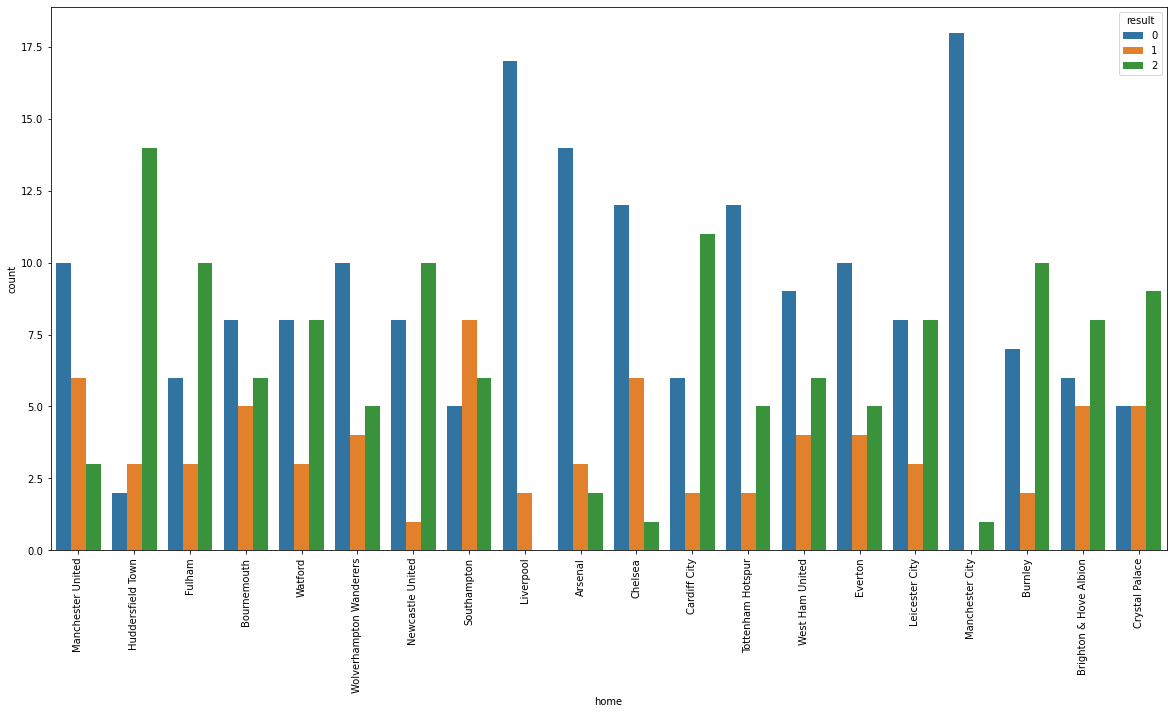

In [89]:
plt.figure(figsize=(20,10))
sns.countplot(data = test5,x = 'home',hue='result')
plt.xticks(rotation=90)

#Wow liverpool win so much at home

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Leicester City'),
  Text(1, 0, 'Chelsea'),
  Text(2, 0, 'Crystal Palace'),
  Text(3, 0, 'Cardiff City'),
  Text(4, 0, 'Brighton & Hove Albion'),
  Text(5, 0, 'Everton'),
  Text(6, 0, 'Tottenham Hotspur'),
  Text(7, 0, 'Burnley'),
  Text(8, 0, 'West Ham United'),
  Text(9, 0, 'Manchester City'),
  Text(10, 0, 'Arsenal'),
  Text(11, 0, 'Newcastle United'),
  Text(12, 0, 'Fulham'),
  Text(13, 0, 'Bournemouth'),
  Text(14, 0, 'Southampton'),
  Text(15, 0, 'Wolverhampton Wanderers'),
  Text(16, 0, 'Huddersfield Town'),
  Text(17, 0, 'Watford'),
  Text(18, 0, 'Manchester United'),
  Text(19, 0, 'Liverpool')])

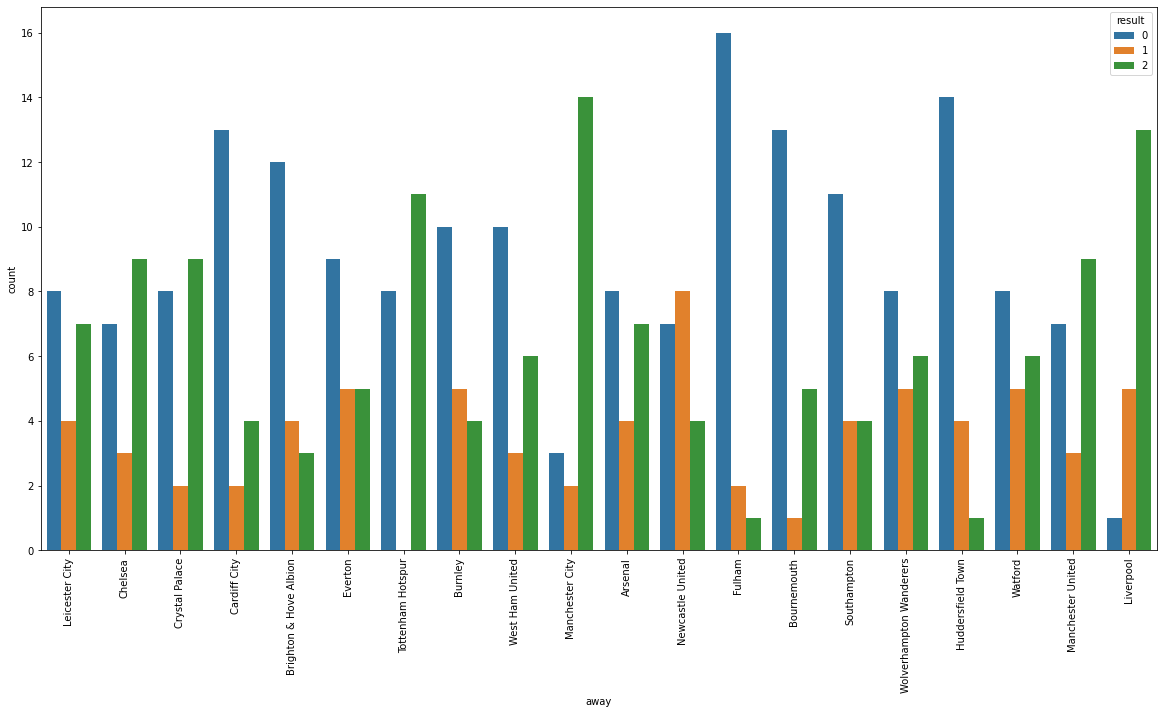

In [90]:
plt.figure(figsize=(20,10))
sns.countplot(data = test5,x = 'away',hue='result')
plt.xticks(rotation=90)

